In [21]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

cmap = plt.cm.get_cmap('Paired')
num_colors = 20
color = cmap(np.linspace(0, 1, num_colors))

## línea de visión 
def recta(x_0, y_0, x, angulo): # todos los puntos son conocidos, la función bota un punto adelante 
    y_recta= y_0+np.tan(np.radians(angulo))*(x-x_0)     

    return y_recta 

def angulos(x_0, y_0, x,y): # todos los puntos son conocidos, la función bota un punto adelante 
    angulos = np.degree(np.arctan((y-y_0)/(x-x_0)))

    return angulos #en grados

############################ 
# calcula el p0
# compara el array del cerro con la recta y da el valor de intersección
# pt_ob = (pt_obx, pt_oby) , array = valor en y del objeto cerro , array_recta = valores de y de la recta en la
# array_x = valores en x
# dirección de observación 

def pto_0(pt_ob, array_x, array): 
    for i in range(pt_ob[0], len(array_x)):
        if pto_0[1]==array[i]: 
            pto_inicial= i
    return (pto_inicial, pto_0[1])

def indice_p2(pt_ob, array_x, array_cerro, array_recta):  
    indice_inicial = 0
    for i in range(pt_ob[0], len(array_x)):
        if (array_recta[i]-array_cerro[i])<0: 
            indice_inicial = i            
                
    return (indice_inicial, array_cerro[indice_inicial])

def indice_p1(pt_ob, array_x, array_cerro, array_recta):  
    indice_final = 0
    for i in range(pt_ob[0], len(array_x)):
        if (array_recta[i]-array_cerro[i])<0: 
            indice_final = i
            break
                
    return (indice_final, array_cerro[indice_final])
    
def distancia(p1, p2): #la entrada     
 
    dist = math.sqrt((p2[1]-p1[1])**2 + (p2[0]-p1[0])**2)  
    return dist  

##############################
## Punto de inicio 
#ptx:   pto de observación
#arr_x: array de valores en X
#arr_y: array de valores del perfil del cerro en Y 

def inicio(punto_inicio, arr_x, arr_y): 
    punto_inicio[0]
    
    for j in range(punto_inicio[0],len(arr_x),1):
        if punto_inicio[1] > arr_y[j]:
            inicio = arr_y[j]
    
    return inicio

###############################
## CÁLCULO DEL LA ELEVACIÓN MÁXIMA DE OBSERVACION


def angulo_maximo(arr_x, np_array, p): #arra_x: indices en el eje X, fila: fila de analisis, p: punto de observación 
        vec_picos = []
        vec  = []
        ind_y = 0 
        ind_x = 0 
    
        for j in range(p[0], len(arr_x)): 
            if np_array[j] > ind_y:
                ind_y = np_array[j]
                ind_x = j 
                
                
        vec_picos.append(ind_x) 
        vec_picos.append(ind_y) 
        
        phi_max = np.degrees(np.tan((ind_y-p[1])/(arr_x[ind_x]-p[0])))
        
        
        return (vec_picos, phi_max) #ángulo en grados

In [23]:
fila = 210
n,m = 300 ,120
apertura = 30

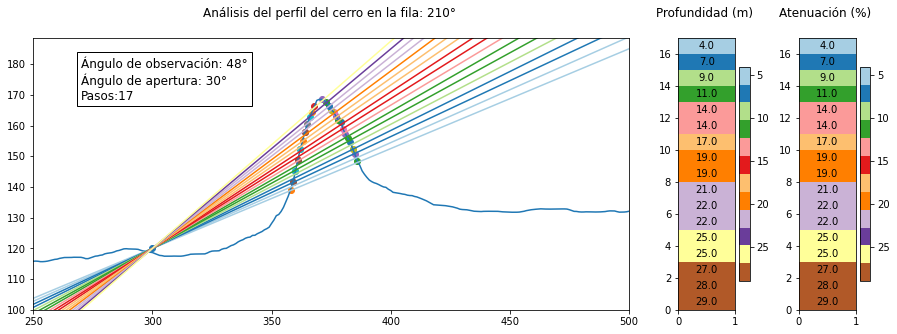

In [25]:
file = './rastert_dem_uni1-clean.txt' ## DEM file
## CARGAR LOS DATOS DEL RASTER 
df = pd.read_csv(file, sep =" ", header=None)
df = df.fillna(0)
df = df.drop(columns=626)#eliminar la última columna 
columnas = df.shape[1] 
filastotal=df.shape[0]

arr_x = np.linspace(0,columnas-1,columnas) #crea los valores en x para iterar
pt_ob = [n,m]
arr_y_cerro = df.iloc[fila].to_numpy()
ang_max = int(np.round(angulo_maximo(arr_x, arr_y_cerro, pt_ob)[1])) 

ang_max = int(np.round(angulo_maximo(arr_x, arr_y_cerro, pt_ob)[1])) 

fig, axs = plt.subplots(1, 3,figsize=(15,5), gridspec_kw={'width_ratios': [5, 0.6,0.6]})  # 2 filas, 1 columna de subplots
#color = ['brown', 'purple', 'red', 'darkgreen','green', 'darkseagreen', 'darkblue','darkslateblue', 'cyan', 'crimson' ]

############
#PLOT 0 
############

axs[0].plot(arr_y_cerro)
axs[0].scatter(pt_ob[0], pt_ob[1])

vec_dis=[]
j=0
axs[0].set_title("Análisis del perfil del cerro en la fila: "+str(fila)+'° \n')
for i in range(ang_max-apertura, ang_max,1):
    y = recta(pt_ob[0], pt_ob[1], arr_x, i)     
    p2 = indice_p2(pt_ob, arr_x, arr_y_cerro, y)
    p1 = indice_p1(pt_ob, arr_x, arr_y_cerro, y) 
    if (p2[0]!=0) or (p1[0]!=0):         
        axs[0].plot(arr_x, y, color=color[j])
        axs[0].scatter(p1[0], p1[1])
        axs[0].scatter(p2[0], p2[1])
        d = distancia(p1,p2)
        j=j+1
        evento = [fila, 90-i,d]  #los valores registrados son azimutales, los valores en el plot son elevación
        vec_dis.append(evento) 
texto = 'Ángulo de observación: '+str(round(ang_max))+'°'+'\nÁngulo de apertura: '+str(apertura)+'°'+'\nPasos:'+ str(j) 
x_pos = n-30
y_pos = np.max(arr_y_cerro)
axs[0].text(x_pos, y_pos, texto,fontsize = '12', bbox=dict(facecolor='white', edgecolor='black', linewidth=1))
axs[0].set_xlim(n-50,500) 
axs[0].set_ylim(100, np.max(arr_y_cerro)+20)       

        
        
############
#PLOT 1
############
a=[]
for i in range(len(vec_dis)):
    r = vec_dis[i][2]
    a.append(np.round(r))

a = np.array(a)
a=a[::-1] 
matriz = np.tile(a, (1,1))
matriz_rotada = np.rot90(matriz) 

axs[1].set_title("Profundidad (m) \n")
 
im = axs[1].pcolormesh(matriz_rotada,cmap="Paired")

for i in range(matriz_rotada.shape[0]):
    for j in range(matriz_rotada.shape[1]): 
        axs[1].text(j+0.5, i+0.5, str(matriz_rotada[i,j]), color='black', ha='center', va='center')



# Ajustar el espaciado entre subplots


############
#PLOT 2 
############


axs[2].set_title("Atenuación (%) \n")
 
io = axs[2].pcolormesh(matriz_rotada,cmap="Paired")

for i in range(matriz_rotada.shape[0]):
    for j in range(matriz_rotada.shape[1]): 
        axs[2].text(j+0.5, i+0.5, str(matriz_rotada[i,j]), color='black', ha='center', va='center')



######################################


#plt.tight_layout()
cbar1 = fig.colorbar(im, ax=axs[1])
cbar2 = fig.colorbar(io, ax=axs[2]) 

cbar1.ax.invert_yaxis()
cbar2.ax.invert_yaxis()
# Mostrar los subplots
plt.savefig('analisis_fila_'+str(fila)+'_angmax_'+str(ang_max)+'_apertura_'+str(apertura)+'_pasos_'+str(1+np.round(ang_max-apertura))+'.jpg')

plt.show()


        
df = pd.DataFrame(vec_dis, columns=['fila','angulo','distancia'])
nombre_file = 'datos_fila_'+str(fila)+'_angmax_'+str(ang_max)+'_apertura_'+str(apertura)+'_pasos_'+str(1+np.round(ang_max-apertura))+'.txt'
df.to_csv(nombre_file, index=False, header=True, sep=' ')
